In [1]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [2]:
import sys
sys.path.append('/users/mtomov13/.conda/envs/venv/lib/python3.6/site-packages/')
print(sys.path)

['/opt/conda/root/lib/python36.zip', '/opt/conda/root/lib/python3.6', '/opt/conda/root/lib/python3.6/lib-dynload', '', '/opt/conda/root/lib/python3.6/site-packages', '/opt/conda/root/lib/python3.6/site-packages/IPython/extensions', '/users/mtomov13/.ipython', '/users/mtomov13/.conda/envs/venv/lib/python3.6/site-packages/']


In [3]:
import pandas as pd

In [4]:
# from https://github.com/bd2kccd/py-causal/blob/development/example/py-causal%20-%20Bootstrapping%20FGES%20Continuous%20in%20Action.ipynb
# see https://www.ccd.pitt.edu/tools/     and    https://bd2kccd.github.io/docs/py-causal/ to setup

#data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
data_dir = "T_fb.txt"
df = pd.read_table(data_dir, sep="\t")

In [5]:
print(df)

          MTG        Put         VS
0    5.306858   6.146039  11.255432
1    3.011575   0.827515   9.098964
2    4.327825   8.435575  14.960765
3    2.441611   7.569087  10.273907
4   -0.068907   0.114927  12.410114
..        ...        ...        ...
115 -5.271536  -1.894399  -9.510848
116 -7.400968  -7.169888  -8.649971
117 -6.681243  -1.233947  -7.431106
118 -1.954336   5.083614  -0.642620
119  4.396028  12.266212   3.913108

[120 rows x 3 columns]


In [6]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

In [7]:
from pycausal import search as s
tetrad = s.tetradrunner()
#tetrad.listScores()

In [8]:
print('sh')
tetrad.listScores() # momchil: to make it work, had to remove .sort() from listScores() in  ~/.conda/envs/venv/lib/python3.6/site-packages/pycausal/search.py

sh
sntaoheu
disc-mixed-bic
conditional-gaussian-other-bic
bdeu
cond-gauss-bic
fisher-z
mixed-var-polynominal-bic
d-separation
sem-bic
disc-bic
multinomial-logistic-regression-bic
sem-bic-deterministic


In [9]:
tetrad.getAlgorithmParameters(algoId = 'fges', scoreId = 'sem-bic')

penaltyDiscount: Penalty discount (min = 0.0) (java.lang.Double) [default:2.0]
faithfulnessAssumed: Yes if (one edge) faithfulness should be assumed (java.lang.Boolean) [default:true]
symmetricFirstStep: Yes if the first step step for FGES should do scoring for both X->Y and Y->X (java.lang.Boolean) [default:false]
maxDegree: The maximum degree of the graph (min = -1) (java.lang.Integer) [default:100]
verbose: Yes if verbose output should be printed or logged (java.lang.Boolean) [default:false]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (java.lang.Integer) [default:1]


In [31]:
tetrad.run(algoId = 'fges', dfs = df, scoreId = 'sem-bic',
           maxDegree = -1, faithfulnessAssumed = True, symmetricFirstStep = True, 
           numberResampling = 5, resamplingEnsemble = 1, addOriginalDataset = True)

In [25]:
tetrad.getNodes()

['MTG', 'Put', 'VS']

In [26]:
tetrad.getEdges()

['VS --- MTG', 'VS --- Put']

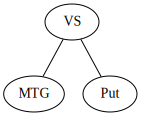

In [23]:
import pydot
from IPython.display import SVG
#dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
#dot_str = tetrad.getDot()
#graphs = pydot.graph_from_dot_data(dot_str)
graphs = [tetrad.getDot()]
svg_str = graphs[0].create_svg()
SVG(svg_str)

In [15]:
tetrad.getDot()

In [36]:
print

<function print>

In [33]:
print(tetrad.getTetradGraph().toString())

Graph Nodes:
MTG,Put,VS

Graph Edges:
1. VS --- MTG
2. VS --- Put



In [35]:
graphs[0].__dict__

{'obj_dict': {'attributes': {},
  'name': 'G',
  'type': 'digraph',
  'strict': False,
  'suppress_disconnected': False,
  'simplify': False,
  'current_child_sequence': 3,
  'nodes': {},
  'edges': {('VS',
    'MTG'): [{'points': ('VS', 'MTG'),
     'attributes': {'arrowhead': 'none'},
     'type': 'edge',
     'parent_graph': <pydot.Dot at 0x2b9a4bd66518>,
     'parent_edge_list': None,
     'sequence': 1}],
   ('VS',
    'Put'): [{'points': ('VS', 'Put'),
     'attributes': {'arrowhead': 'none'},
     'type': 'edge',
     'parent_graph': <pydot.Dot at 0x2b9a4bd66518>,
     'parent_edge_list': None,
     'sequence': 2}]},
  'subgraphs': {},
  'parent_graph': <pydot.Dot at 0x2b9a4bd66518>},
 'set_remincross': <function pydot.Common.create_attribute_methods.<locals>.<lambda>(x, a='remincross')>,
 'get_remincross': <function pydot.Common.create_attribute_methods.<locals>.<lambda>(a='remincross')>,
 'set_dimen': <function pydot.Common.create_attribute_methods.<locals>.<lambda>(x, a='dime